# Week 5: Data types and missing values

In this week's tutorial, we will go over some common data types that you will see in pandas as well as learn how to deal with missing values.

We will be using the kaggle house prices dataset which you can download [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

We aim to investigate how the different features of a house affect its final sale price. Each row of the dataset represents a single house and its many characteristics. The target (response) variable is the sale price.

## Import pandas and numpy

In [12]:
import pandas as pd
import numpy as np

## Load data

In [18]:
data = pd.read_csv("C:/Users/Jason Chong/Documents/Kaggle/house-prices/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data types

We can use pandas function [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) to grab the data type of every column in a data frame.

In [19]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Alternatively, if we only want to consider a particular column, we can do this.

In [20]:
# Check the data type of the SalePrice column

data['SalePrice'].dtype

dtype('int64')

What are the most common data types that you will see in pandas?

- int64 (integer)
- float64 (floating point number)
- object (string)
- datetime (datetime)
- bool (true or false)


We can convert a column of one type into another using the [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) function.

In [61]:
# Convert the SalePrice column into float64 data type

data['SalePrice'].astype('float64')

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

## Locating missing values

First let's recall how we can figure out how many null values are there in our dataframe.

In [22]:
# How many null values are there in our dataframe?

data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

This is sometimes difficult to see when we have too many columns. One of my favourite ways to visualise null values is via the missingno.matrix function.

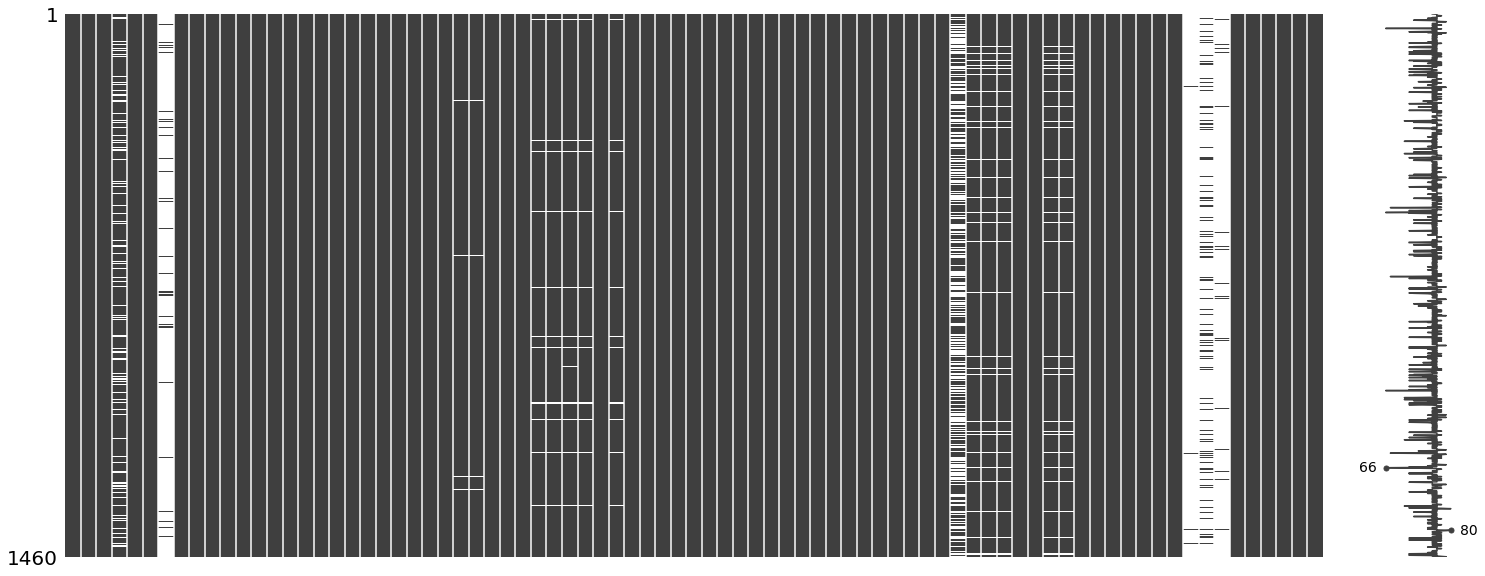

In [25]:
# Import missingno library
import missingno

# Visualise null values
missingno.matrix(data)

It is also helpful to compute the percentage of the values in our dataset that are missing.

We can do this by dividing the total number of missing cells by the total number of cells in the dataframe.

In [27]:
# Compute total number of cells in dataframe and cells with missing values
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()

# Compute percentage
percentage_missing = total_missing / total_cells * 100
print(percentage_missing)

5.889565364451209


## Dealing with missing values

There are mainly two ways to deal with missing data.

1. Drop the rows or columns which contain missing data 
2. Replace missing data with substituted values also known as imputation

Both methods have their own individual pros and cons. Which of the two methods you use will be highly dependent on your data as well as the nature of the problem you are trying to solve. If you are working on detailed piece of analysis, this is where you would take the time to really understand each column to figure out the best strategy to handle those missing values.

Generally speaking, dropping data is much easier and straightforward to implement but it does come at the expense of removing potentially useful information from our dataset. This will adversely affect model performance which then leads to inaccurate model predictions.

On the other hand, choosing the best way to impute or replace those missing values require more time, consideration and experience. I will briefly touch upon the different ways to impute missing values in the later part of this notebook.

## Method 1: Drop rows or columns with missing values

If you are in a hurry or don't have a reason to figure out why your values are missing, one option is to remove rows or columns that contain missing values. However, this is not the best approach in most cases because we might lose potentially useful information in our dataset.

Let's see how we can drop rows and columns with missing values using the [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function. 

In [64]:
# Drop rows with missing values

data.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Yikes, it appears that we have dropped all the rows in our dataframe. This is not good. 

Ideally, we would only remove rows if we have a large number of training examples and if the rows with missing data is not a high number. In our example, all the rows have at least one missing feature therefore dropping rows with missing data is not a good strategy to use.

Maybe we should remove columns with missing values instead.

In [65]:
# Drop columns with missing values

col_with_na_dropped = data.dropna(axis = 1)
col_with_na_dropped.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [39]:
# How much data did we lose?

print("Number of columns in original dataset: ", data.shape[1])
print("Number of columns left after dropping: ", col_with_na_dropped.shape[1])
difference = data.shape[1] - col_with_na_dropped.shape[1]
print("We have dropped a total of %d columns." %difference)

Number of columns in original dataset:  81
Number of columns left after dropping:  62
We have dropped a total of 19 columns.


We are dropping a substantial amount of features from our dataset, almost a quarter! 

Features in our example are the characteristics that describe the house. If we remove features that are significant in explaining the sale price of the house, our model will not be able to make accurate predictions. 

In an ideal scenario, it is only safe to drop a column if there is significant random missing data present in a column and if we have reasons to believe that the column is unimportant in predicting our target variable. 

Let's have a closer look at the features that we are dropping. 

In [107]:
col_with_na = data.columns[data.isnull().any()]
list(col_with_na)

['Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

To iterate, only drop rows and columns if you have significant amount missing data or that the data is not important in predicting the target variable. 

Now let's look at a better approach for dealing with missing data via imputation.

## Method 2: Filling in missing values

There are a couple of ways to impute missing data that is subjective to the situation. 

In this section, I will go through the two of the most common technique to fill missing data:

1. Using mean or median values (for numerical variables)
2. Using mode or zero (for categorical variables)

Numerical variables are continuous random variable like height, age, total sales whereas categorical variables are discrete random variables like yes or no, pass or fail, small, medium or large etc.

The main function to use here is the [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function. 

In [108]:
# Suppose we want to fill missing data in the LotFrontage column 
# First let's examine the data type

data['LotFrontage'].dtype

dtype('float64')

In [73]:
data['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

Row number 8 has missing value.

Suppose we want to fill all missing data in that column with the median.

In [109]:
# Compute median

data['LotFrontage'].median()

69.0

In [76]:
# Impute missing data in LotFrontage with median

data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7    69.0
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

Row number 8 has been filled with the median of the LotFrontage column that is 69.

Now let's look at an example of a categorical variable like GarageType.

In [87]:
# Check data type of GarageType column

data['GarageType'].dtype

dtype('O')

In [110]:
# Let's see the value counts in that column including the nulll value

data['GarageType'].value_counts(dropna = False)

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

The most frequent observation is Attchd.

Suppose we want to fill the missing data with this observation.

In [102]:
data['GarageType'].mode()[0]

'Attchd'

In [96]:
data['GarageType'].tail(10)

1450        NaN
1451     Attchd
1452    Basment
1453        NaN
1454     Attchd
1455     Attchd
1456     Attchd
1457     Attchd
1458     Attchd
1459     Attchd
Name: GarageType, dtype: object

In [103]:
data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageType'].tail(10)

1450     Attchd
1451     Attchd
1452    Basment
1453     Attchd
1454     Attchd
1455     Attchd
1456     Attchd
1457     Attchd
1458     Attchd
1459     Attchd
Name: GarageType, dtype: object

The missing values have now been replaced with the mode.

We can also fill the missing data with any number or text that we like. Let's consider the GarageQual feature.

Suppose we want to replace the null values with the word 'Unknown'.

In [111]:
data['GarageQual'].value_counts(dropna = False)

TA         1311
Unknown      81
Fa           48
Gd           14
Ex            3
Po            3
Name: GarageQual, dtype: int64

In [106]:
data['GarageQual'] = data['GarageQual'].fillna('Unknown')
data['GarageQual'].value_counts(dropna = False)

TA         1311
Unknown      81
Fa           48
Gd           14
Ex            3
Po            3
Name: GarageQual, dtype: int64

Notice how the NaN value has been replaced with the word Unknown.

There are other more sophisticated methods of imputing missing data like using other features that are correlated to help determine the appropriate substitute value. However, I won't be covering those concepts in this tutorial but if you are interested, you can check out this [article](https://medium.com/x8-the-ai-community/handling-missing-values-in-data-54e1dc77e24f).